# Forecasting NQH2O Prices Using CALFEWS


In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

Futures on the Nasdaq Veles California Water Index are available for trading through CME Group. Pricing Data download from [Nasdaq](https://indexes.nasdaqomx.com/Index/History/NQH2O). Weighting and industry breakdown needs subscription. 


Prices reflect the commodity value of water at the source and do not include additional costs associated with transportation or losses.
Water price data is:  
1. Aggregated from the five largest and most actively traded markets in California 
** central basin, chino basin, main san gabriel basin, mojave basin, surface water
2. Priced weekly in US$ per Acre Foot ($/AF)
3. Sourced weekly from Waterlitix™ – a pricing and market information database developed and maintained by WestWater Research
4. Data based on volume transacted across western market over past 10 yrs. Growth driven by expansion of high valued specialty crops in CA.

In [16]:
import os
print(os.getcwd())
os.chdir("C:/Users/danli/OneDrive - University of North Carolina at Chapel Hill/CAL_water_price_index")
print(os.getcwd())
# open .xlsx file
NQH2O_hist = pd.read_excel('NQH2O_20180801-20240819.xlsx')
NQH2O_hist.rename({'Trade Date': 'Date', 'Index Value': 'NQH2O'}, axis=1, inplace=True)
NQH2O_hist = NQH2O_hist[['Date', 'NQH2O']]
# NQH2O_hist.info()
NQH2O_pre = pd.read_csv('AdditionalData_NQH2O.csv', encoding='ISO-8859-1')
NQH2O_pre = NQH2O_pre[['Date', 'NQH2O']]
# NQH2O_pre
NQH2O_pre['Date'] = pd.to_datetime(NQH2O_pre['Date'])

C:\Users\danli\OneDrive - University of North Carolina at Chapel Hill\github\CALFEWS
C:\Users\danli\OneDrive - University of North Carolina at Chapel Hill\CAL_water_price_index


In [17]:
# Combining the datasets
combined_df = pd.concat([NQH2O_hist, NQH2O_pre]).sort_values(by='Date')
combined_df

,Date,NQH2O
0,2013-01-09,222.02
1,2013-01-16,146.89
2,2013-01-23,113.34
3,2013-01-30,109.68
4,2013-02-06,109.77
...,...,...
4,2024-07-17,408.06
3,2024-07-24,417.58
2,2024-07-31,429.86
1,2024-08-07,440.10


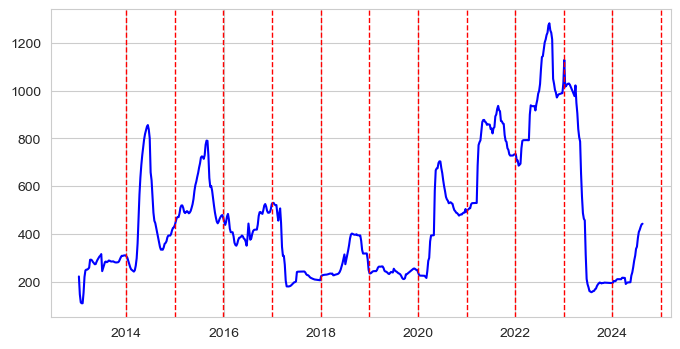

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(combined_df['Date'], combined_df['NQH2O'], label='Price over time', color='blue')
# Adding vertical lines at the end of each year
for year in range(combined_df['Date'].dt.year.min(), combined_df['Date'].dt.year.max() + 1):
    plt.axvline(pd.Timestamp(f'{year}-12-31'), color='red', linestyle='--', linewidth=1)

plt.savefig('NQH2O_price_over_time.png')

# Align data (CALFEWS output + NQH2O)

In [19]:
import os

# Get the current working directory
current_directory = os.getcwd()

os.chdir("C:/Users/danli/OneDrive - University of North Carolina at Chapel Hill/github/CALFEWS")
current_directory

'C:\\Users\\danli\\OneDrive - University of North Carolina at Chapel Hill\\CAL_water_price_index'

In [20]:
# !pip install cython

In [21]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [22]:

%%cython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import sys
from configobj import ConfigObj
import json
from distutils.util import strtobool
import h5py
from calfews_src.model_cy cimport Model
from calfews_src.inputter_cy import Inputter
from calfews_src.scenario import Scenario
from calfews_src.util import *
from calfews_src.plotter import *
from calfews_src.visualizer import Visualizer
from datetime import datetime

In [25]:
# import libraries
import numpy as np
import pandas as pd
import h5py
import json
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import compress
import os
from datetime import datetime
from calfews_src import *
from calfews_src.visualizer import Visualizer

# results hdf5 file location from CALFEWS simulations
output_folder = "results/20-year_example/"
output_file = output_folder + 'results.hdf5'
fig_folder = output_folder + 'figs/'

# now load simulation output
datDaily = get_results_sensitivity_number_outside_model(output_file, '')



In [26]:
datDaily

,shasta_S,shasta_R,shasta_R_to_delta,shasta_available_storage,shasta_outflow_release,shasta_days_til_full,shasta_Q,shasta_SNPK,shasta_downstream,shasta_fnf,...,kgr_FKC_flow,kgr_KWD_flow,kgr_TLB_flow,kgr_CNS_turnout,kgr_ALT_turnout,kgr_KRWA_turnout,kgr_FRS_turnout,kgr_FKC_turnout,kgr_KWD_turnout,kgr_TLB_turnout
1996-10-01,3090.000000,6.850909,6.446281,0.000000,5.450302e+03,999.99,9.832066,0.00,5.726281,0.016008,...,0.0,0.0,0.0,0.257203,0.000000,0.000000,0.268614,0.0,0.0,0.0
1996-10-02,3092.804628,6.868760,6.446281,348.783198,5.440962e+03,999.99,9.288595,0.00,4.952727,0.011496,...,0.0,0.0,0.0,0.255636,0.000000,0.000000,0.266885,0.0,0.0,0.0
1996-10-03,3095.055868,6.854876,6.446281,759.802673,5.431622e+03,999.99,8.969256,0.00,4.996364,0.003981,...,0.0,0.0,0.0,0.254070,0.000000,0.000000,0.265155,0.0,0.0,0.0
1996-10-04,3097.039339,6.825124,6.446281,1208.746177,5.422282e+03,999.99,10.657190,0.00,6.204298,0.003513,...,0.0,0.0,0.0,0.252503,0.000000,0.000000,0.263426,0.0,0.0,0.0
1996-10-05,3100.677025,6.811240,6.446281,1195.109414,5.412942e+03,999.99,6.870744,0.00,4.540165,0.010363,...,0.0,0.0,0.0,0.250937,0.000000,0.000000,0.261697,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-26,2175.505744,9.578182,8.991074,-30.517066,2.491636e+01,999.99,8.122314,72.92,0.926281,0.001742,...,0.0,0.0,0.0,0.398361,0.425738,0.926193,0.391756,0.0,0.0,0.0
2016-09-27,2173.795992,9.865785,9.244959,-29.611510,1.661091e+01,999.99,8.401983,72.92,0.672397,0.002827,...,0.0,0.0,0.0,0.375475,0.411164,1.003880,0.371537,0.0,0.0,0.0
2016-09-28,2172.098141,9.284628,8.669752,-28.725650,8.305455e+00,999.99,7.983471,72.92,1.247603,0.005533,...,0.0,0.0,0.0,0.352590,0.396591,1.180641,0.351318,0.0,0.0,0.0
2016-09-29,2170.600621,10.206942,9.623802,-29.203016,-1.563194e-13,999.99,5.803636,72.92,0.293554,0.009331,...,0.0,0.0,0.0,0.329705,0.382018,1.631744,0.331099,0.0,0.0,0.0


In [10]:
print(list(datDaily.keys()))
# start with berrenda_tableA_delivery outhbay_tableA_turnback', 

['shasta_S', 'shasta_R', 'shasta_R_to_delta', 'shasta_available_storage', 'shasta_outflow_release', 'shasta_days_til_full', 'shasta_Q', 'shasta_SNPK', 'shasta_downstream', 'shasta_fnf', 'oroville_S', 'oroville_R', 'oroville_R_to_delta', 'oroville_available_storage', 'oroville_outflow_release', 'oroville_days_til_full', 'oroville_Q', 'oroville_SNPK', 'oroville_downstream', 'oroville_fnf', 'yuba_S', 'yuba_R', 'yuba_R_to_delta', 'yuba_available_storage', 'yuba_outflow_release', 'yuba_days_til_full', 'yuba_Q', 'yuba_SNPK', 'yuba_downstream', 'yuba_fnf', 'folsom_S', 'folsom_R', 'folsom_R_to_delta', 'folsom_available_storage', 'folsom_outflow_release', 'folsom_days_til_full', 'folsom_Q', 'folsom_SNPK', 'folsom_fnf', 'newmelones_S', 'newmelones_R', 'newmelones_R_to_delta', 'newmelones_Q', 'newmelones_SNPK', 'newmelones_downstream', 'newmelones_fnf', 'donpedro_S', 'donpedro_R', 'donpedro_R_to_delta', 'donpedro_Q', 'donpedro_SNPK', 'donpedro_downstream', 'donpedro_fnf', 'exchequer_S', 'excheque

In [29]:
# Assuming your dataframe is named 'df'
datDaily_selected = datDaily.loc['2013':'2016', 'berrenda_tableA_delivery':'wonderful_BLR_tableA_delivery']   #outhbay_cvpdelta_turnback is not unique
datDaily_selected

,berrenda_tableA_delivery,berrenda_tableA_projected,berrenda_tableA_dynamic_recharge_cap,berrenda_cvpdelta_dynamic_recharge_cap,berrenda_exchange_dynamic_recharge_cap,berrenda_cvc_dynamic_recharge_cap,berrenda_friant1_dynamic_recharge_cap,berrenda_friant2_dynamic_recharge_cap,berrenda_kaweah_dynamic_recharge_cap,berrenda_tule_dynamic_recharge_cap,...,southbay_tableA_recharged,southbay_tableA_paper,southbay_exchanged_GW,southbay_tableA_carryover,southbay_cvpdelta_carryover,southbay_cvpdelta_recharged,southbay_exchange_recharged,southbay_tableA_turnback,southbay_cvpdelta_turnback,wonderful_BLR_tableA_delivery
2013-01-01,0.339863,18.153249,999.000000,999.0,999.0,999.0,999.0,999.0,999.0,999.0,...,2.723132,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,5.912083
2013-01-02,0.348789,18.218932,999.000000,999.0,999.0,999.0,999.0,999.0,999.0,999.0,...,2.723132,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,6.024528
2013-01-03,0.357704,18.286832,999.000000,999.0,999.0,999.0,999.0,999.0,999.0,999.0,...,2.723132,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,6.139076
2013-01-04,0.366608,18.340244,999.000000,999.0,999.0,999.0,999.0,999.0,999.0,999.0,...,2.723132,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,6.255728
2013-01-05,0.375502,18.280428,999.000000,999.0,999.0,999.0,999.0,999.0,999.0,999.0,...,2.723132,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,6.374483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-26,10.640327,10.453705,10.272310,999.0,999.0,999.0,999.0,999.0,999.0,999.0,...,21.842287,0.0,0.0,26.024517,6.574000,0.0,0.0,-4.221508,-0.427644,72.834283
2016-09-27,10.833490,10.272682,10.079240,999.0,999.0,999.0,999.0,999.0,999.0,999.0,...,22.184222,0.0,0.0,26.024517,6.574000,0.0,0.0,-4.221508,-0.427644,72.834283
2016-09-28,11.026653,10.079519,9.886171,999.0,999.0,999.0,999.0,999.0,999.0,999.0,...,22.527409,0.0,0.0,26.024517,6.574000,0.0,0.0,-4.221508,-0.427644,72.834283
2016-09-29,11.219815,9.886356,9.693101,999.0,999.0,999.0,999.0,999.0,999.0,999.0,...,22.879044,0.0,0.0,26.024517,6.574000,0.0,0.0,-4.221508,-0.427644,72.834283


In [30]:
# Assuming your dataframe is named 'df'
datDaily_selected = datDaily_selected.loc[:, ~datDaily_selected.columns.str.contains('cap')]
datDaily_selected


,berrenda_tableA_delivery,berrenda_tableA_projected,berrenda_irr_demand,berrenda_tot_demand,berrenda_tableA_flood,berrenda_PIO_recharged,berrenda_BRM_recharged,berrenda_friant1_flood,berrenda_tule_flood,berrenda_kaweah_flood,...,southbay_tableA_recharged,southbay_tableA_paper,southbay_exchanged_GW,southbay_tableA_carryover,southbay_cvpdelta_carryover,southbay_cvpdelta_recharged,southbay_exchange_recharged,southbay_tableA_turnback,southbay_cvpdelta_turnback,wonderful_BLR_tableA_delivery
2013-01-01,0.339863,18.153249,0.008936,8.413633,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,2.723132,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,5.912083
2013-01-02,0.348789,18.218932,0.008926,8.404685,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,2.723132,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,6.024528
2013-01-03,0.357704,18.286832,0.008915,8.395738,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,2.723132,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,6.139076
2013-01-04,0.366608,18.340244,0.008904,8.386791,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,2.723132,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,6.255728
2013-01-05,0.375502,18.280428,0.008893,8.377844,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,2.723132,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,6.374483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-26,10.640327,10.453705,0.000013,0.000385,0.0,28.177817,4.701034,0.0,0.0,0.001667,...,21.842287,0.0,0.0,26.024517,6.574000,0.0,0.0,-4.221508,-0.427644,72.834283
2016-09-27,10.833490,10.272682,0.000010,0.000289,0.0,28.764891,4.856018,0.0,0.0,0.001667,...,22.184222,0.0,0.0,26.024517,6.574000,0.0,0.0,-4.221508,-0.427644,72.834283
2016-09-28,11.026653,10.079519,0.000006,0.000192,0.0,29.348990,5.013654,0.0,0.0,0.001667,...,22.527409,0.0,0.0,26.024517,6.574000,0.0,0.0,-4.221508,-0.427644,72.834283
2016-09-29,11.219815,9.886356,0.000003,0.000096,0.0,29.928947,5.174728,0.0,0.0,0.001667,...,22.879044,0.0,0.0,26.024517,6.574000,0.0,0.0,-4.221508,-0.427644,72.834283


In [31]:
merged_df = pd.merge(datDaily_selected, combined_df, left_on=datDaily_selected.index, right_on='Date')

merged_df.set_index("Date", inplace = True)
merged_df
# Step 3: Optionally, drop the 'index' column if no longer needed
# merged_df.drop('index', axis=1, inplace=True)

,berrenda_tableA_delivery,berrenda_tableA_projected,berrenda_irr_demand,berrenda_tot_demand,berrenda_tableA_flood,berrenda_PIO_recharged,berrenda_BRM_recharged,berrenda_friant1_flood,berrenda_tule_flood,berrenda_kaweah_flood,...,southbay_tableA_paper,southbay_exchanged_GW,southbay_tableA_carryover,southbay_cvpdelta_carryover,southbay_cvpdelta_recharged,southbay_exchange_recharged,southbay_tableA_turnback,southbay_cvpdelta_turnback,wonderful_BLR_tableA_delivery,NQH2O
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-09,0.410968,18.364584,0.008850,8.342055,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,6.870531,222.02
2013-01-16,0.472618,18.230068,0.008775,8.279424,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,7.819584,146.89
2013-01-23,0.533741,17.662152,0.008700,8.216793,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,8.871685,113.34
2013-01-30,0.594336,16.425865,0.008624,8.154162,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,10.026835,109.68
2013-02-06,0.654338,15.670989,0.008530,8.093535,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,13.778852,3.613822,0.0,0.0,0.000000,0.000000,11.228893,109.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,6.854482,14.225302,0.000096,0.002885,0.0,15.734836,3.119427,0.0,0.0,0.001667,...,0.0,0.0,26.024517,6.574000,0.0,0.0,-4.221508,-0.427644,72.834283,418.10
2016-09-07,6.952443,14.015509,0.000074,0.002212,0.0,16.124346,3.119427,0.0,0.0,0.001667,...,0.0,0.0,26.024517,6.574000,0.0,0.0,-4.221508,-0.427644,72.834283,418.12
2016-09-14,8.420153,12.695618,0.000051,0.001539,0.0,21.515453,3.447426,0.0,0.0,0.001667,...,0.0,0.0,26.024517,6.574000,0.0,0.0,-4.221508,-0.427644,72.834283,439.07


# Feature selection using Lasso

In [38]:
# !pip install scikit-learn

In [37]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel 
from sklearn.metrics import classification_report 
from sklearn.datasets import load_breast_cancer 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
import seaborn as sns 

In [39]:
# Segregating the Feature and Target
X = merged_df.drop("NQH2O", axis=1).values
y = merged_df["NQH2O"].values
time = merged_df.index.values  
# Train Test Split
X_train, X_test, y_train, y_test,time_train, _ = train_test_split(X, y,time, test_size=0.20, random_state=0)
print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))
print("Shape of time: {}".format(time_train.shape))

Shape of Train Features: (156, 953)
Shape of Test Features: (39, 953)
Shape of Train Target: (156,)
Shape of Test Target: (39,)
Shape of time: (156,)


In [40]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Lasso on the scaled data
lasso1 = Lasso(alpha=0.1, max_iter=1000000)
lasso1.fit(X_train_scaled, y_train)


Lasso(alpha=0.1, max_iter=1000000)

select important features (954 --> 83)

In [41]:
names=merged_df.drop("NQH2O", axis=1).columns
# print("Column Names: {}".format(names.values))
# Subsetting the features which has more than 0.001 importance.
lasso1_coef = np.abs(lasso1.coef_)
feature_subset=np.array(names)[lasso1_coef>1]
# print("Selected Feature Columns: {}".format(feature_subset))
# Adding the target to the list of feaatures.
feature_subset=np.append(feature_subset, "NQH2O")
# print("Selected Columns: {}".format(feature_subset))
df_new = merged_df[feature_subset]
df_new

,berrenda_irr_demand,belridge_pumping,belridge_tableA_recharged,buenavista_tableA_delivery,buenavista_kern_projected,buenavista_tableA_turnback,buenavista_pumping,cawelo_tableA_projected,cawelo_tableA_paper,cawelo_NKB_recharged,...,kaweahdelta_kaweah_flood_irrigation,socal_irr_demand,socal_irr_demand,socal_pumping,socal_pumping,centralcoast_irr_demand,centralcoast_irr_demand,southbay_cvpdelta_projected,southbay_cvpdelta_projected,NQH2O
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-09,0.008850,0.000000,0.000000,0.177116,127.897137,0.0,0.000000e+00,26.530946,0.000000,0.000000,...,0.000000,0.044552,0.044552,0.000000,0.000000,0.048,0.048,35.406488,35.406488,222.02
2013-01-16,0.008775,0.000000,0.000000,0.177116,119.789648,0.0,0.000000e+00,26.383532,0.000000,0.000000,...,0.000000,0.616356,0.616356,0.000000,0.000000,0.071,0.071,33.172620,33.172620,146.89
2013-01-23,0.008700,0.000000,0.000000,0.441537,108.728013,0.0,0.000000e+00,25.357320,0.000000,0.000000,...,0.000000,0.584199,0.584199,0.000000,0.000000,0.084,0.084,31.019793,31.019793,113.34
2013-01-30,0.008624,0.052200,0.000000,0.965062,96.099779,0.0,0.000000e+00,22.976443,0.000000,0.000000,...,0.000000,0.690721,0.690721,0.000000,0.000000,0.031,0.031,28.892400,28.892400,109.68
2013-02-06,0.008530,0.052319,0.000000,1.489349,84.447387,0.0,0.000000e+00,21.569366,0.000000,0.000000,...,0.000000,0.419558,0.419558,0.000000,0.000000,0.135,0.135,26.887158,26.887158,109.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,0.000096,0.000000,0.000000,40.452475,0.000000,0.0,8.597967e-06,9.347118,-1.574456,0.484173,...,1.828215,0.055749,0.055749,0.055749,0.055749,0.559,0.559,6.842831,6.842831,418.10
2016-09-07,0.000074,0.000000,0.000000,43.721429,0.000000,0.0,6.781886e-07,7.130354,-1.574456,0.484173,...,1.828215,0.052792,0.052792,0.052792,0.052792,0.488,0.488,4.985257,4.985257,418.12
2016-09-14,0.000051,0.000000,0.000000,46.460885,0.000000,0.0,6.255128e-12,4.913589,-1.574456,0.484173,...,1.828215,0.049652,0.049652,0.000000,0.000000,0.381,0.381,3.818504,3.818504,439.07


In [44]:
# Get the indices of the selected columns
column_names = merged_df.columns
# Remove duplicates, keep only the first occurrence
unique_column_names = pd.Index(pd.Series(column_names).drop_duplicates().tolist())
selected_indices = [unique_column_names.get_loc(col) for col in feature_subset]

In [45]:
# selected_features = lasso.coef_ != 0
X_train_selected = X_train_scaled[:, selected_indices]  # Select the features from X_train
X_test_selected = X_test_scaled[:, selected_indices]    # Select the features from X_test

# Step 3: Train model using only the selected features
# lasso_selected = Lasso(alpha=0.001, max_iter=10000)

# Set up K-Fold cross-validation (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# lasso_selected.fit(X_train_selected, y_train)
lasso_cv = LassoCV(alphas=np.logspace(-4, 0, 50), cv=5, max_iter=100000)
# lasso_cv = LassoCV(alphas=[1,0.1,0.01,10], cv=5, max_iter=100000)

lasso_cv.fit(X_train_selected, y_train)
print(f"Optimal alpha: {lasso_cv.alpha_}")

# Step 4: Make predictions and calculate R² score
y_pred_train = lasso_cv .predict(X_train_selected)
y_pred_test = lasso_cv .predict(X_test_selected)

# R² score & MSE for training data
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

# R² score & MSE for test data
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"R² Score (Train): {r2_train}")
print(f"MSE (Train): {mse_train}")
print(f"R² Score (Test): {r2_test}")
print(f"MSE (Test): {mse_test}")


Optimal alpha: 0.033932217718953266
R² Score (Train): 0.9925780336750746
MSE (Train): 188.64996905270704
R² Score (Test): 0.9474970773875183
MSE (Test): 1350.6777686928472


In [46]:

# 2. Ridge Regression
ridge = Ridge(max_iter=100000)
params = {"alpha": np.logspace(-4, 0, 50)}
ridge_cv = GridSearchCV(ridge, param_grid={"alpha": params["alpha"]}, cv=kf)
ridge_cv.fit(X_train_selected, y_train)

# Optimal alpha for Ridge
print("Best Ridge Alpha: {}".format(ridge_cv.best_params_))

# Ridge Predictions and R² score
y_pred_train_ridge = ridge_cv.predict(X_train_selected)
y_pred_test_ridge = ridge_cv.predict(X_test_selected)

r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

print(f"Ridge R² Score (Train): {r2_train_ridge}")
print(f"Ridge R² Score (Test): {r2_test_ridge}")

# Compare Lasso and Ridge Results
print(f"\nComparison of Lasso vs Ridge:")
print(f"Lasso Train R²: {r2_train}, Ridge Train R²: {r2_train_ridge}")
print(f"Lasso Test R²: {r2_test}, Ridge Test R²: {r2_test_ridge}")

Best Ridge Alpha: {'alpha': 0.47148663634573895}
Ridge R² Score (Train): 0.9909560140553023
Ridge R² Score (Test): 0.9523285976709804

Comparison of Lasso vs Ridge:
Lasso Train R²: 0.9925780336750746, Ridge Train R²: 0.9909560140553023
Lasso Test R²: 0.9474970773875183, Ridge Test R²: 0.9523285976709804


In [47]:
# Step 2: Sort the training data by time
sorted_indices = np.argsort(time_train)  # Get indices that would sort time_train
time_train_sorted = time_train[sorted_indices]
y_train_sorted = y_train[sorted_indices]
y_pred_train_lasso_sorted = y_pred_train[sorted_indices]  # Ensure predictions are sorted too
y_pred_train_ridge_sorted = y_pred_train_ridge[sorted_indices]

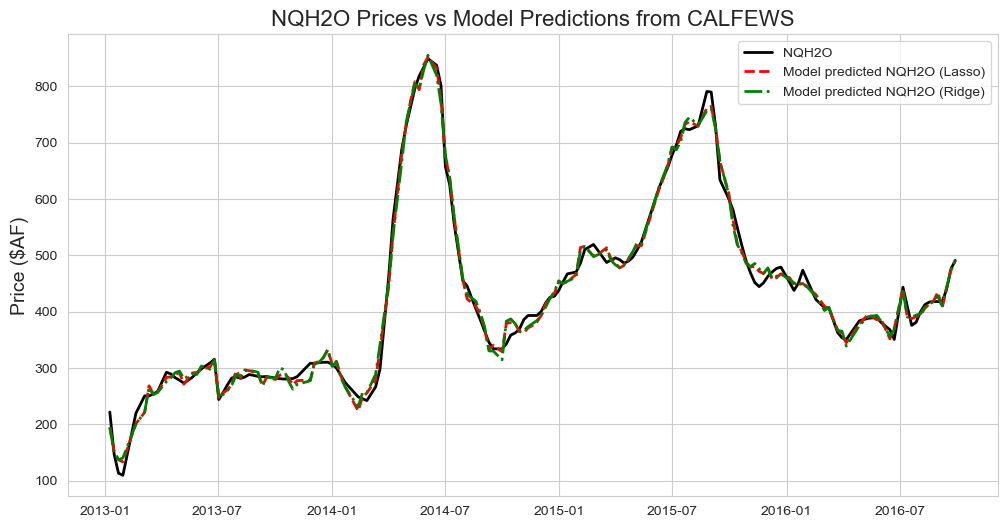

In [48]:
plt.figure(figsize=(12, 6))
# Create a time axis (e.g., 100 time points)
time = np.arange(len(y_train))
# Plot the original and fitted values
plt.plot(time_train_sorted, y_train_sorted, label='NQH2O', color='black', linewidth=2)  # Original values
plt.plot(time_train_sorted, y_pred_train_lasso_sorted, label='Model predicted NQH2O (Lasso)', color='red', linestyle='--', linewidth=2)  # Fitted values
plt.plot(time_train_sorted, y_pred_train_ridge_sorted, label='Model predicted NQH2O (Ridge)', color='green', linestyle='-.', linewidth=2)  # Fitted values

# Add title and labels
plt.title('NQH2O Prices vs Model Predictions from CALFEWS', fontsize=16)
# plt.xlabel('Time', fontsize=14)
plt.ylabel('Price ($AF)', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [49]:
# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check how many components are selected
print(f"Number of components selected: {X_train_pca.shape[1]}")

# Step 3: Train models on PCA-transformed data

# Lasso Model
lasso = LassoCV(alphas=[0.1, 1, 10, 0.01], cv =3)
lasso.fit(X_train_pca, y_train)

y_pred_train_lasso_pca = lasso.predict(X_train_pca)
y_pred_test_lasso_pca = lasso.predict(X_test_pca)

r2_train_lasso = r2_score(y_train, y_pred_train_lasso_pca)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso_pca)

print(f"Lasso R² (Train): {r2_train_lasso}")
print(f"Lasso R² (Test): {r2_test_lasso}")

# Ridge Model
ridge = RidgeCV(alphas=[0.1, 1, 10, 0.01], cv =3)
ridge.fit(X_train_pca, y_train)

y_pred_train_ridge_pca = ridge.predict(X_train_pca)
y_pred_test_ridge_pca = ridge.predict(X_test_pca)

r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

print(f"Ridge R² (Train): {r2_train_ridge}")
print(f"Ridge R² (Test): {r2_test_ridge}")

Number of components selected: 12
Lasso R² (Train): 0.7465182383784635
Lasso R² (Test): 0.7093400315924395
Ridge R² (Train): 0.9909560140553023
Ridge R² (Test): 0.9523285976709804


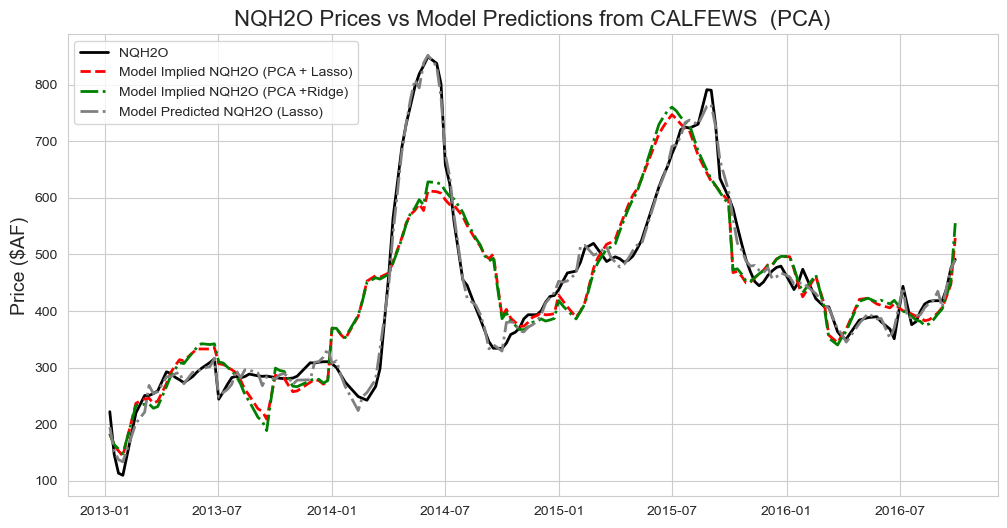

In [50]:
# Sort the training data by time
sorted_indices = np.argsort(time_train)  # Get indices that would sort time_train
time_train_sorted = time_train[sorted_indices]
y_train_sorted = y_train[sorted_indices]
y_pred_train_lasso_pca_sorted = y_pred_train_lasso_pca[sorted_indices]  # Ensure predictions are sorted too
y_pred_train_ridge_pca_sorted = y_pred_train_ridge_pca[sorted_indices]

#  Plot the sorted data
plt.figure(figsize=(12, 6))

# Plot original values (sorted)
plt.plot(time_train_sorted, y_train_sorted, label='NQH2O', color='black', linewidth=2)
plt.plot(time_train_sorted, y_pred_train_lasso_pca_sorted, label='Model Implied NQH2O (PCA + Lasso)', color='red', linestyle='--', linewidth=2)
plt.plot(time_train_sorted, y_pred_train_ridge_pca_sorted, label='Model Implied NQH2O (PCA +Ridge)', color='green', linestyle='-.', linewidth=2)
plt.plot(time_train_sorted, y_pred_train_lasso_sorted, label='Model Predicted NQH2O (Lasso)', color='grey', linestyle='-.', linewidth=2)

# Add title and labels
plt.title('NQH2O Prices vs Model Predictions from CALFEWS  (PCA)', fontsize=16)
# plt.xlabel('Time', fontsize=14)
plt.ylabel('Price ($AF)', fontsize=14)
plt.legend(loc='best')
plt.grid(True)

# Format the x-axis for dates (if needed)
# plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

using PCA for dim reduction in regression ignores the relationship between X and y. So dropping low variance components while ignoring their relationship to y is a dubious idea.
* It is not uncommon to see that the major PCs are insignificant in a prediction model. The PC is the largest force or variation source in by definition, but not necessarily the one that correlates with any outcome variable with the strongest correlation.
* Both penalize low variance directions in X. 
* avoid under-fitting, we can always do hyper-parameter tuning to find best lambda.
While PCA has been widely used, it is often criticized as a black box model that lacks interpretability. It depends on the circumstances where the PCA is used. Sometimes, it is not easy to connect the identified principal components with physical entities. 

https://dataanalyticsbook.info/chapter-8-scalability-lasso-pca.html#:~:text=Both%20methods%20can%20reduce%20the,a.k.a.%2C%20the%20new%20features).


Alignment of pricing data - Tabular data 
Y - x1, x2,,, Xn 

# Feature selection + RF

R² score: 0.9448326698091326
MSE_test: 1419.2216878461536
R² score_train: 0.9780910292122245
MSE_train: 556.8775820512822


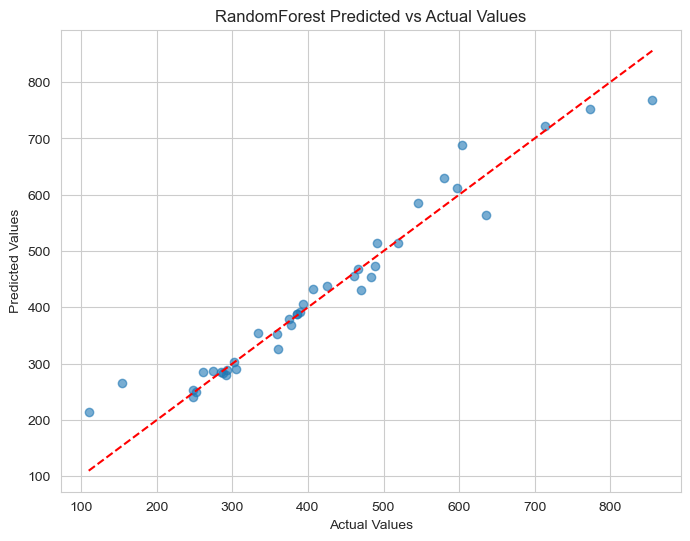

Selected Features and Coefficients:
Feature: berrenda_irr_demand, Coefficient: -19.832164793114924
Feature: berrenda_PIO_recharged, Coefficient: 0.25410074560781976
Feature: belridge_tableA_projected, Coefficient: -4.852402153222981
Feature: belridge_irr_demand, Coefficient: -0.3214939706939929
Feature: belridge_pumping, Coefficient: 0.9842778730925447
Feature: belridge_tableA_recharged, Coefficient: 0.02237108078923175
Feature: belridge_tableA_paper, Coefficient: -1.5686758077595235
Feature: buenavista_tableA_delivery, Coefficient: 13.071853488820349
Feature: buenavista_tableA_projected, Coefficient: -6.120499258701753
Feature: buenavista_tableA_turnback, Coefficient: 0.01965961381571603
Feature: cawelo_tableA_projected, Coefficient: 1.7583738172155603
Feature: cawelo_NKB_recharged, Coefficient: 1.104376935445412
Feature: henrymiller_tableA_paper, Coefficient: 26.47145535410231
Feature: henrymiller_exchanged_SW, Coefficient: -16.52203467591111
Feature: henrymiller_exchanged_GW, Coeffi

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
X = merged_df.drop("NQH2O", axis=1).values
y = merged_df["NQH2O"].values
time = merged_df.index.values  
X_train, X_test, y_train, y_test, time_train,  _ = train_test_split(X, y, time, test_size=0.20, random_state=0)
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit LassoCV model with more iterations and adjusted tolerance
lasso_cv = LassoCV(cv=5, max_iter=5000, tol=1e-4)
lasso_cv.fit(X_train_scaled, y_train)

# Feature selection
sfm = SelectFromModel(lasso_cv, prefit=True)
X_train_selected = sfm.transform(X_train_scaled)
X_test_selected = sfm.transform(X_test_scaled)

# Train a Random Forest Regressor using the selected features
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = model.predict(X_test_selected)
y_pred_train = model.predict(X_train_selected)


# Calculate R² and MSE
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"R² score: {r2_test}")
print(f"MSE_test: {mse_test}")
print(f"R² score_train: {r2_train}")
print(f"MSE_train: {mse_train}")

# Plot y_pred vs y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RandomForest Predicted vs Actual Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.show()

# Analyze selected features and their importance
selected_feature_indices = np.where(sfm.get_support())[0]
selected_features = merged_df.columns[selected_feature_indices]
coefficients = lasso_cv.coef_

# Print selected features and their coefficients
print("Selected Features and Coefficients:")
selected_features_with_coefficients = zip(selected_features, coefficients[selected_feature_indices])
for feature, coef in selected_features_with_coefficients:
    print(f"Feature: {feature}, Coefficient: {coef}")


In [52]:
X_train_selected.shape

(156, 67)

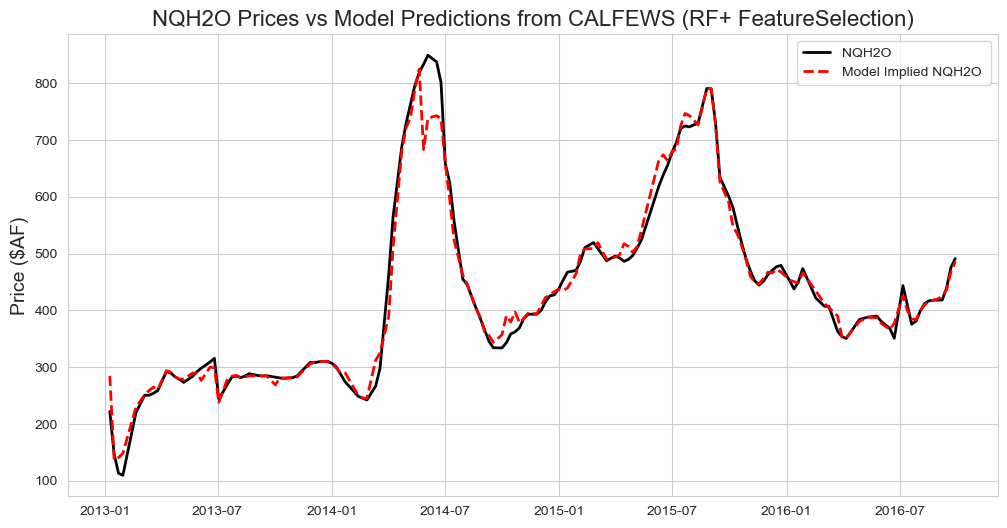

In [53]:
# Step 2: Sort the training data by time
sorted_indices = np.argsort(time_train)  # Get indices that would sort time_train
time_train_sorted = time_train[sorted_indices]
y_train_sorted = y_train[sorted_indices]
y_pred_train_sorted = y_pred_train[sorted_indices]  # Ensure predictions are sorted too

#  Plot the sorted data
plt.figure(figsize=(12, 6))

# Plot original values (sorted)
plt.plot(time_train_sorted, y_train_sorted, label='NQH2O', color='black', linewidth=2)
plt.plot(time_train_sorted, y_pred_train_sorted, label='Model Implied NQH2O ', color='red', linestyle='--', linewidth=2)

# Add title and labels
plt.title('NQH2O Prices vs Model Predictions from CALFEWS (RF+ FeatureSelection)', fontsize=16)
plt.ylabel('Price ($AF)', fontsize=14)
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()